
# CARDIOVASCULAR DISEASE 

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year. CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease (CHD), cerebrovascular disease, rheumatic heart disease and other conditions. Four out of 5CVD deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age. Individuals at risk of CVD may demonstrate raised blood pressure, glucose, and lipids as well as overweight and obesity. These factors can all be easily measured in primary care facilities. Knowing the factors that contribute most and identifying the people at highest risk of CVDs using these parameters can help prevent premature deaths by giving appropriate treatment.


## GROUPS IN THE DATASET

sex: male or female;
age: age of the patient;
education: levels coded 1 for some high school, 2 for a high school diploma or GED, 3 for some college or vocational school, and 4 for a college degree.
Smoking status : currentSmoker (whether or not the patient is a current smoker)
Number of cigarettes : cigsPerDay (the average number of cigarettes smoked daily)
BP Meds: whether or not the patient was on blood pressure medication
prevalentStroke: whether or not the patient had previously had a stroke
prevalentHyp: whether or not the patient was hypertensive
diabetes: whether or not the patient had diabetes
Risk factors from the first physical examination of the patient.
totChol: total cholesterol level


For this project after cleaning the data, I will analyze the contributing factors to the outcome of coronary Heart disease.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import statsmodels.api as sm

from scipy import stats
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [2]:
df = pd.read_csv('/Users/aslihankoksoy/Documents/PLAY DATA/framingham.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# CLEANING DATA

Here I search the data for missing values, Na, NaN, and try to replace these as much as I can. I take a look at  the spread of the data in each column and fill the missing values accordingly with spread; using mean, mode or median. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
#finds counts of missing data
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
#finds percentage of data missing
df.isna().mean().round(2)*100

male               0.0
age                0.0
education          2.0
currentSmoker      0.0
cigsPerDay         1.0
BPMeds             1.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            1.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            9.0
TenYearCHD         0.0
dtype: float64

#descriptive stats and the plots of the data will show the shape and spread of the data and guide us on strategies for cleaning

In [7]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


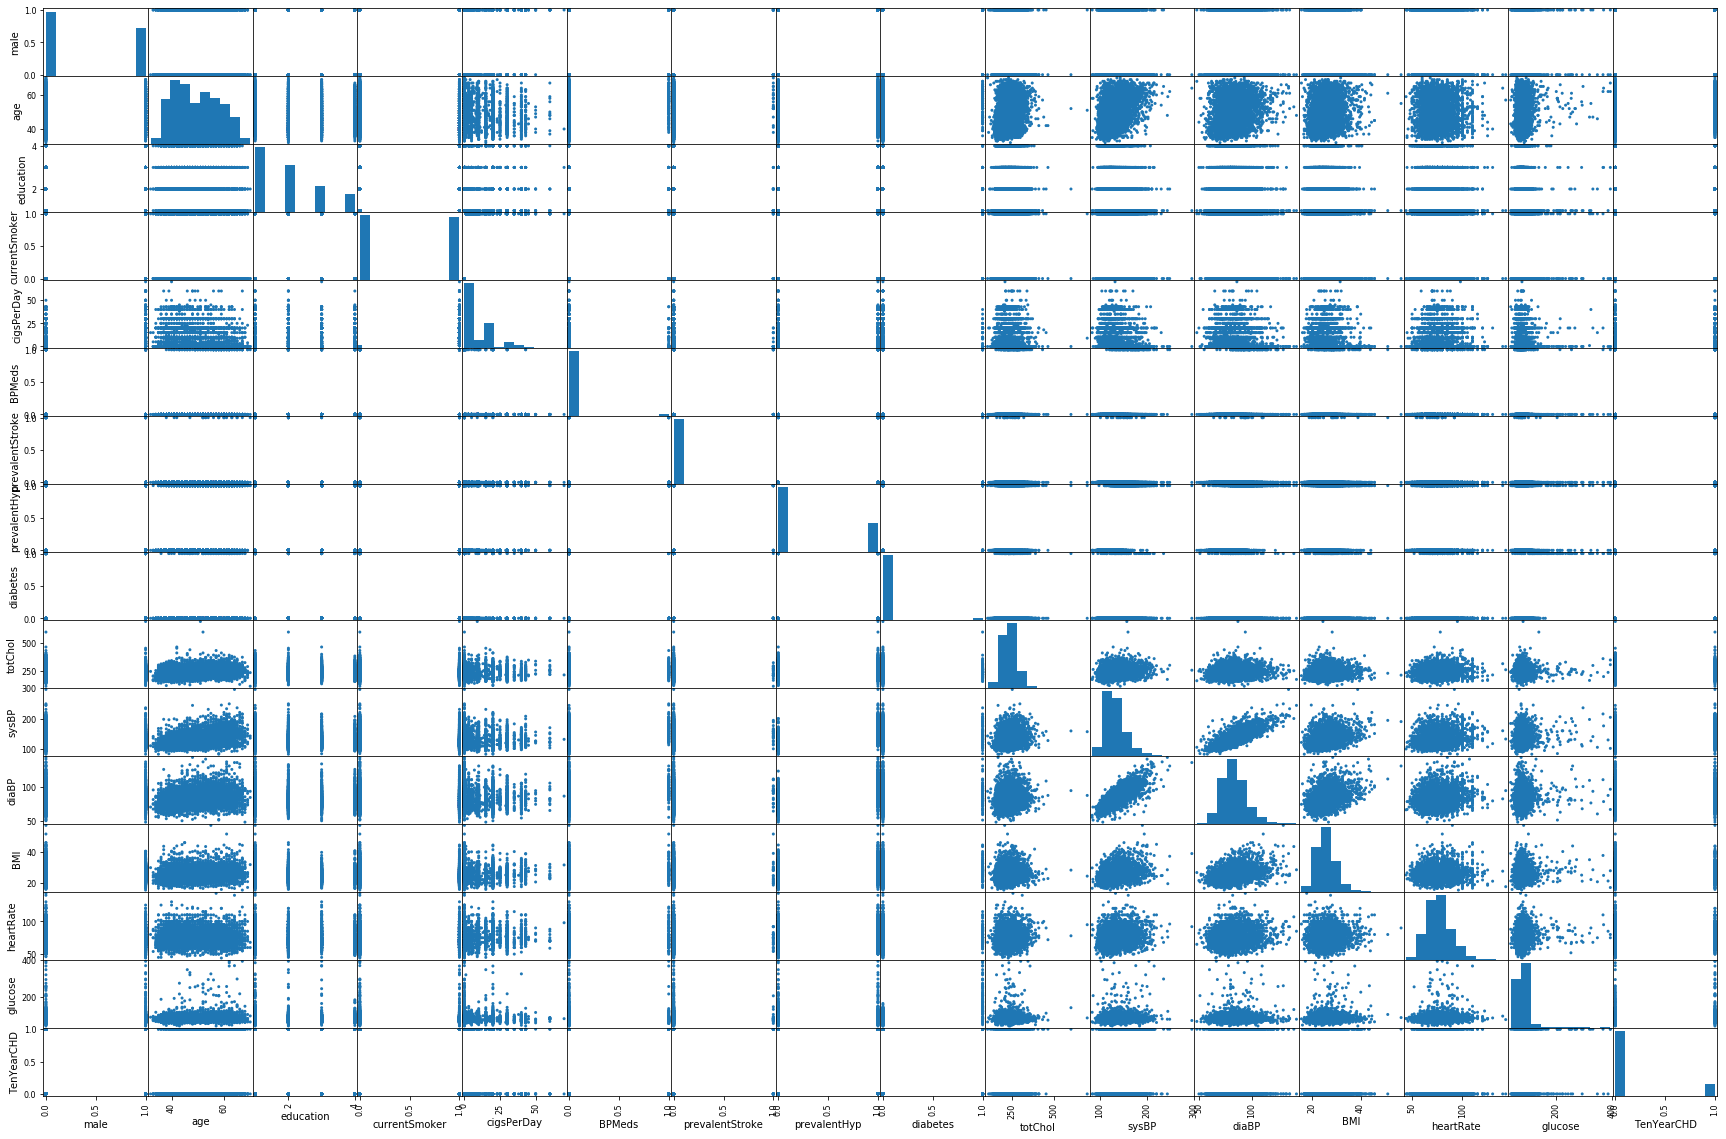

In [8]:
pd.plotting.scatter_matrix(df, alpha = 1, figsize = (30, 20))
plt.show()

#to correct for cigs Per day missing values: The cigsPerday missing values are only one percent of the data but since the data volume is limited I did not want to get rid of these. The smoker status column has no missing values, so these values will be pasted to cigsperday column thinking a person has to have at least one cig per day to be a smoker.

In [8]:
#corrects cigsPerDay missing values
df['cigsPerDay'] = df.apply(
    lambda row: row['currentSmoker'] if np.isnan(row['cigsPerDay']) else row['cigsPerDay'],
    axis=1
)

In [9]:
df['cigsPerDay'].mean()

8.951179245283019

In [10]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Continue Cleaning and save the clean file

#to correct for education missing values: Education data is modular, and mode will be the correct replacement
#all of the remaining missing values in other gorups will be replaced by group mean due to dispersed data
#I will have to drop the missing BP meds and heart rate 

In [11]:
df['totChol'].mean()

236.69952267303103

In [12]:
df['glucose'].mean()

81.96365524402907

In [13]:
df['BMI'].mean()

25.800800758114182

In [14]:
df['totChol'] = df.apply(lambda x: df['totChol'].fillna(df['totChol'].mean()),axis=0)

In [15]:
df['totChol'].mean()

236.69952267303108

In [16]:
df['BMI'] = df.apply(lambda x: df['BMI'].fillna(df['BMI'].mean()),axis=0)

In [17]:
df['BMI'].mean()

25.800800758114182

In [18]:
df['glucose'] = df.apply(lambda x: df['glucose'].fillna(df['glucose'].mean()),axis=0)

In [19]:
df['glucose'].mean()

81.96365524402951

In [20]:
df['education'].mode()

0    1.0
dtype: float64

In [21]:
df['education'].fillna(1, inplace=True)

In [22]:
df['education'].isnull().values.any()  

False

In [23]:
df.isnull().sum()

male                0
age                 0
education           0
currentSmoker       0
cigsPerDay          0
BPMeds             53
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

In [24]:
dfclean=df.dropna()

In [25]:
dfclean.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [26]:
dfclean1 = dfclean.round()

In [27]:
dfclean1.to_csv('CleanedFr1.csv', index=False)

# EDA

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import statsmodels.api as sm

from scipy import stats
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [29]:
#imports the file
df= pd.read_csv('/Users/aslihankoksoy/Documents/PLAY DATA/CleanedFr1.csv')

#reads the head part of files
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,27.0,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,29.0,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,128.0,80.0,25.0,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,29.0,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.0,85.0,85.0,0


# Descriptive Statistics
Visualizing the data with descriptive data analysis, boxcharts, and correlation analysis will enable us to see the spread and distribution of the data and give us general information on the cleaned dataset. 

In [30]:
#gives descriptive stats 
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4186.00000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000
mean,0.43096,49.527234,1.981605,0.494744,8.958911,0.029623,0.005733,0.309126,0.025561,236.660535,132.281892,82.887721,25.804109,75.876732,81.959627,0.150979
std,0.49527,8.553960,1.006263,0.500032,11.897581,0.169564,0.075511,0.462188,0.157842,44.227263,21.975545,11.879656,4.081118,12.054896,22.906136,0.358072
min,0.00000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,84.000000,48.000000,16.000000,44.000000,40.000000,0.000000
25%,0.00000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.000000,68.000000,72.000000,0.000000
50%,0.00000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.000000,75.000000,80.000000,0.000000
75%,1.00000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.000000,83.000000,85.000000,0.000000
max,1.00000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.000000,57.000000,143.000000,394.000000,1.000000


Text(0.5, 1.0, 'BoxPlot for all Attributes')

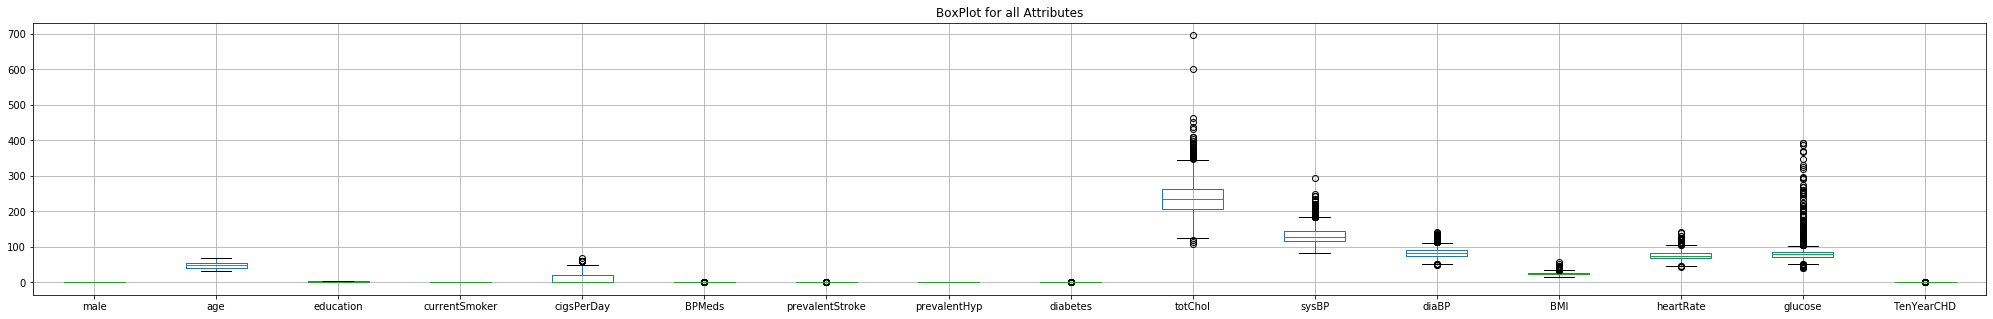

In [32]:
# creates boxplot for descriptive stats
df.boxplot()
mpl.rcParams['figure.figsize'] = (35,5)
plt.title("BoxPlot for all Attributes")

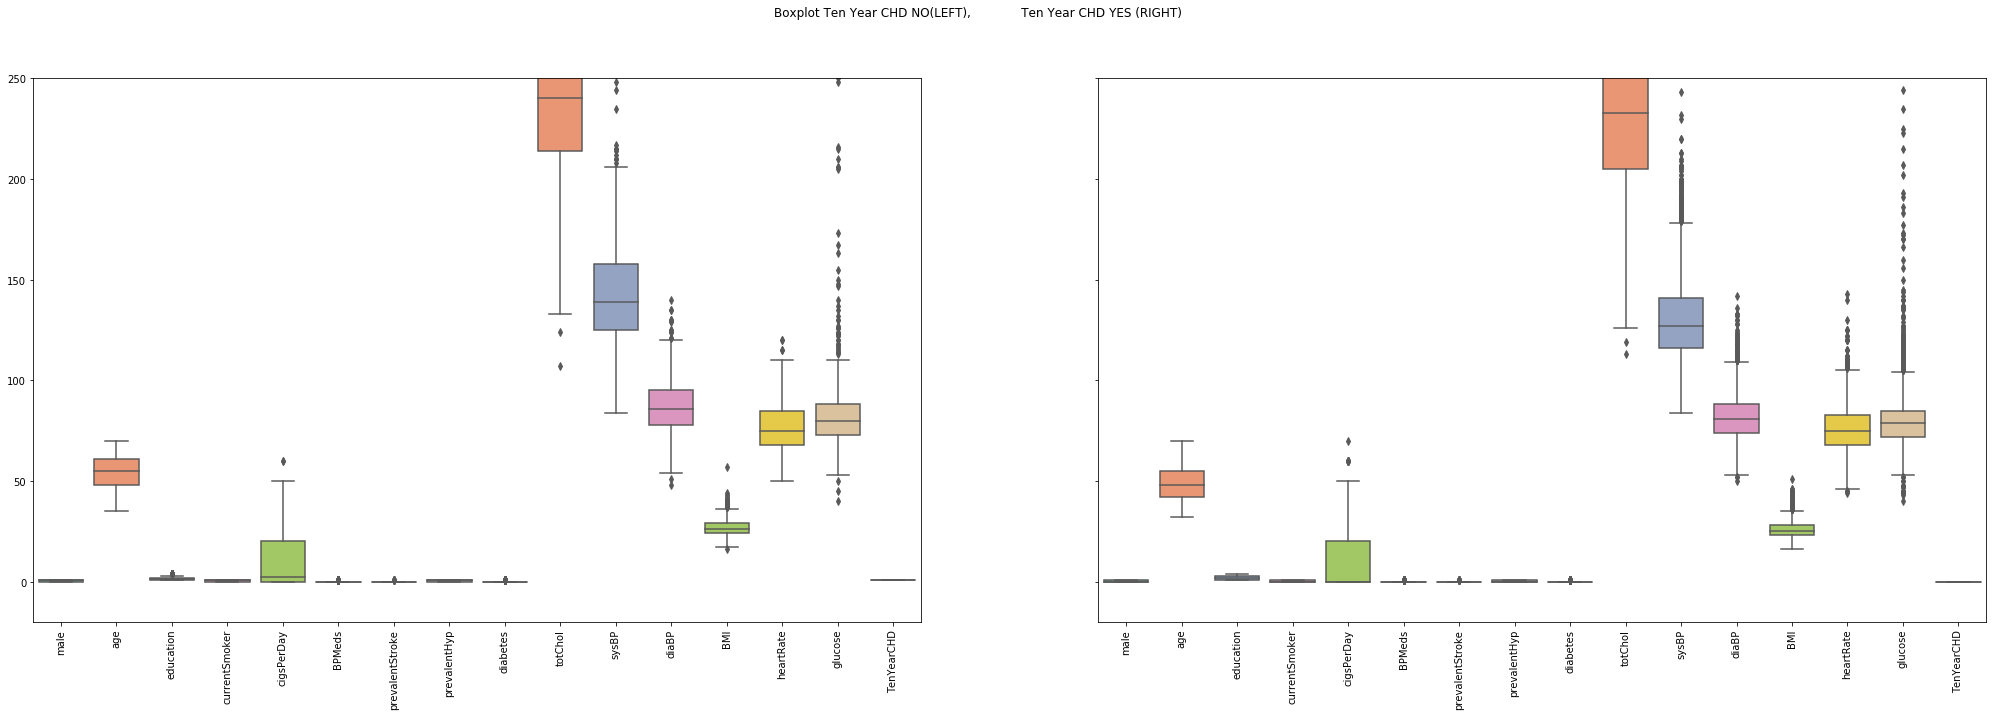

In [33]:
#creates boxplots for attributes with regard to 10 year CHD outcome

dataframe_boxplots = df[df['TenYearCHD'] ==1]
mpl.rcParams['figure.figsize'] = (35,10)
f, axes = plt.subplots(1,2,sharey=True)

f.suptitle('Boxplot Ten Year CHD NO(LEFT),             Ten Year CHD YES (RIGHT)')
sns.boxplot(data=dataframe_boxplots, orient='v', palette='Set2', ax=axes[0])

dataframe_boxplots = df[df['TenYearCHD'] ==0]
sns.boxplot(data=dataframe_boxplots, orient='v', palette='Set2', ax=axes[1])

for ax in f.axes:
    mpl.pyplot.sca(ax)
    plt.ylim(-20,250)
    plt.xticks(rotation=90)

plt.show()

# Correlation Analysis
Correlation matrix shows us that many factors are all weakly correlated with the 10 year CHD outcome. The stongest correlation is found with **age, systolic blood pressure, prevalent hypertension and diastolic heart pressure**.
Additionally we can observe the strong correlation between contributing factors (such as the strong correlation between diabetes and glucose, or Hypertension and systolicBP, which validates the correctness of the matrix.

In [34]:
df_cor = df.corr()
display(df_cor)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.025163,0.015431,0.195366,0.315129,-0.052465,-0.002192,0.006615,0.014938,-0.066484,-0.034612,0.058504,0.080670,-0.117129,0.006526,0.091128
age,-0.025163,1.000000,-0.162632,-0.211667,-0.189659,0.123165,0.054139,0.304478,0.102219,0.258778,0.392485,0.208193,0.133961,-0.012305,0.116306,0.223335
education,0.015431,-0.162632,1.000000,0.018091,0.007940,-0.010810,-0.033204,-0.081278,-0.036154,-0.022186,-0.129196,-0.064917,-0.134471,-0.054515,-0.032283,-0.053965
currentSmoker,0.195366,-0.211667,0.018091,1.000000,0.761051,-0.048891,-0.030844,-0.101530,-0.042196,-0.045347,-0.126967,-0.105088,-0.168415,0.063040,-0.051850,0.020447
cigsPerDay,0.315129,-0.189659,0.007940,0.761051,1.000000,-0.045234,-0.030856,-0.063305,-0.034686,-0.026201,-0.086440,-0.054276,-0.089209,0.072763,-0.054151,0.059340
BPMeds,-0.052465,0.123165,-0.010810,-0.048891,-0.045234,1.000000,0.117367,0.261200,0.052053,0.079659,0.254261,0.194176,0.100236,0.015230,0.049094,0.087677
prevalentStroke,-0.002192,0.054139,-0.033204,-0.030844,-0.030856,0.117367,1.000000,0.072444,0.007749,-0.003638,0.057345,0.051595,0.027682,-0.013398,0.009804,0.056352
prevalentHyp,0.006615,0.304478,-0.081278,-0.101530,-0.063305,0.261200,0.072444,1.000000,0.078359,0.160547,0.695407,0.617290,0.301178,0.146951,0.082432,0.175617
diabetes,0.014938,0.102219,-0.036154,-0.042196,-0.034686,0.052053,0.007749,0.078359,1.000000,0.043790,0.109727,0.051357,0.083818,0.050507,0.606853,0.096585
totChol,-0.066484,0.258778,-0.022186,-0.045347,-0.026201,0.079659,-0.003638,0.160547,0.043790,1.000000,0.208317,0.165081,0.119097,0.091479,0.044930,0.076386


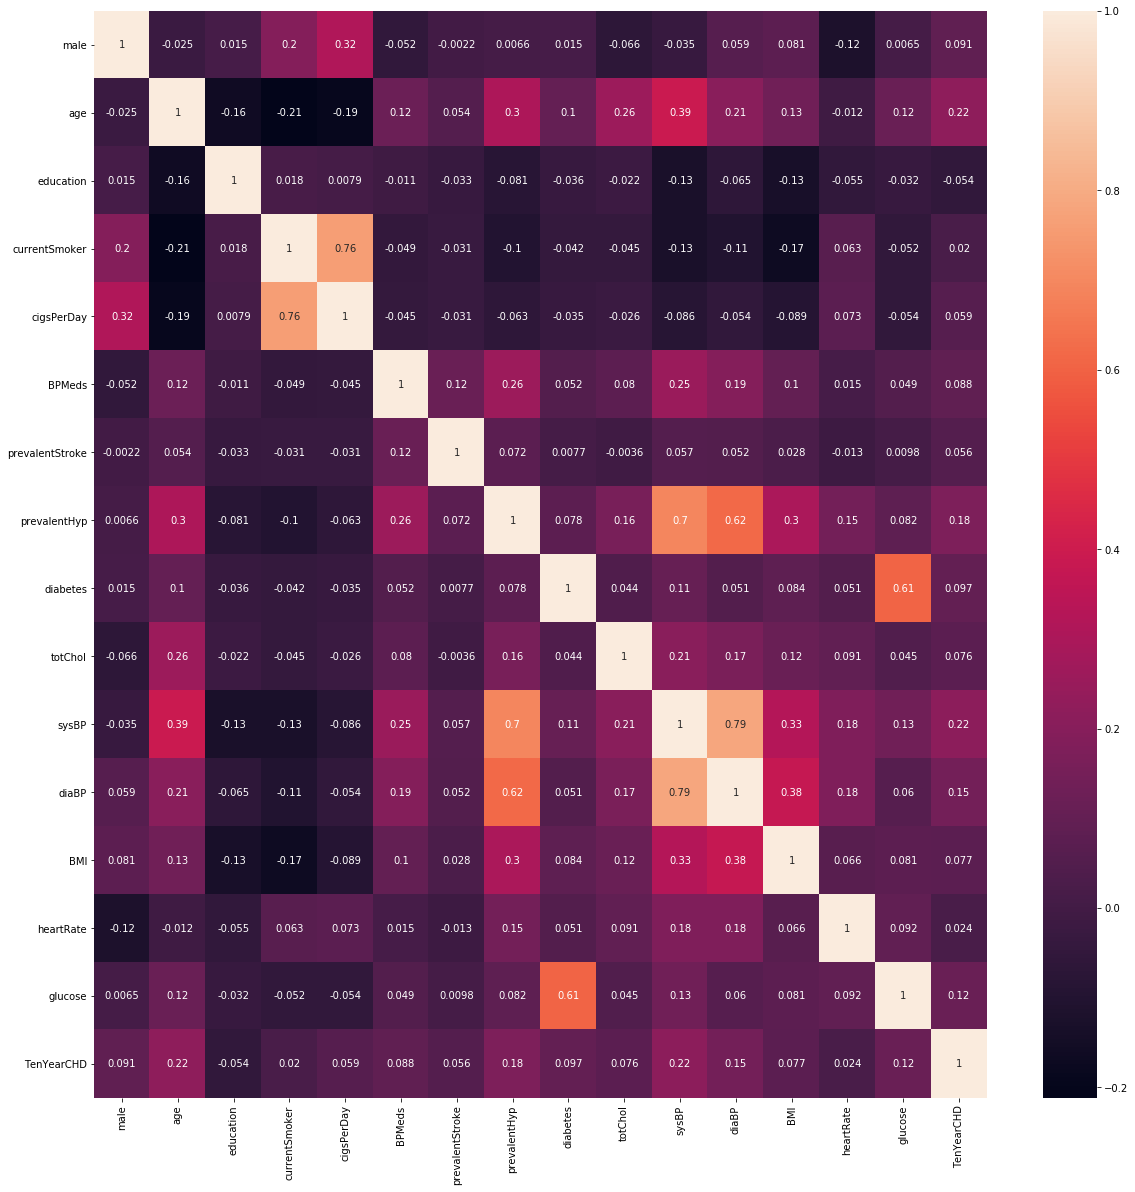

In [36]:
mpl.rcParams['figure.figsize'] = (20,20)
sns.heatmap(df_cor, annot = True)

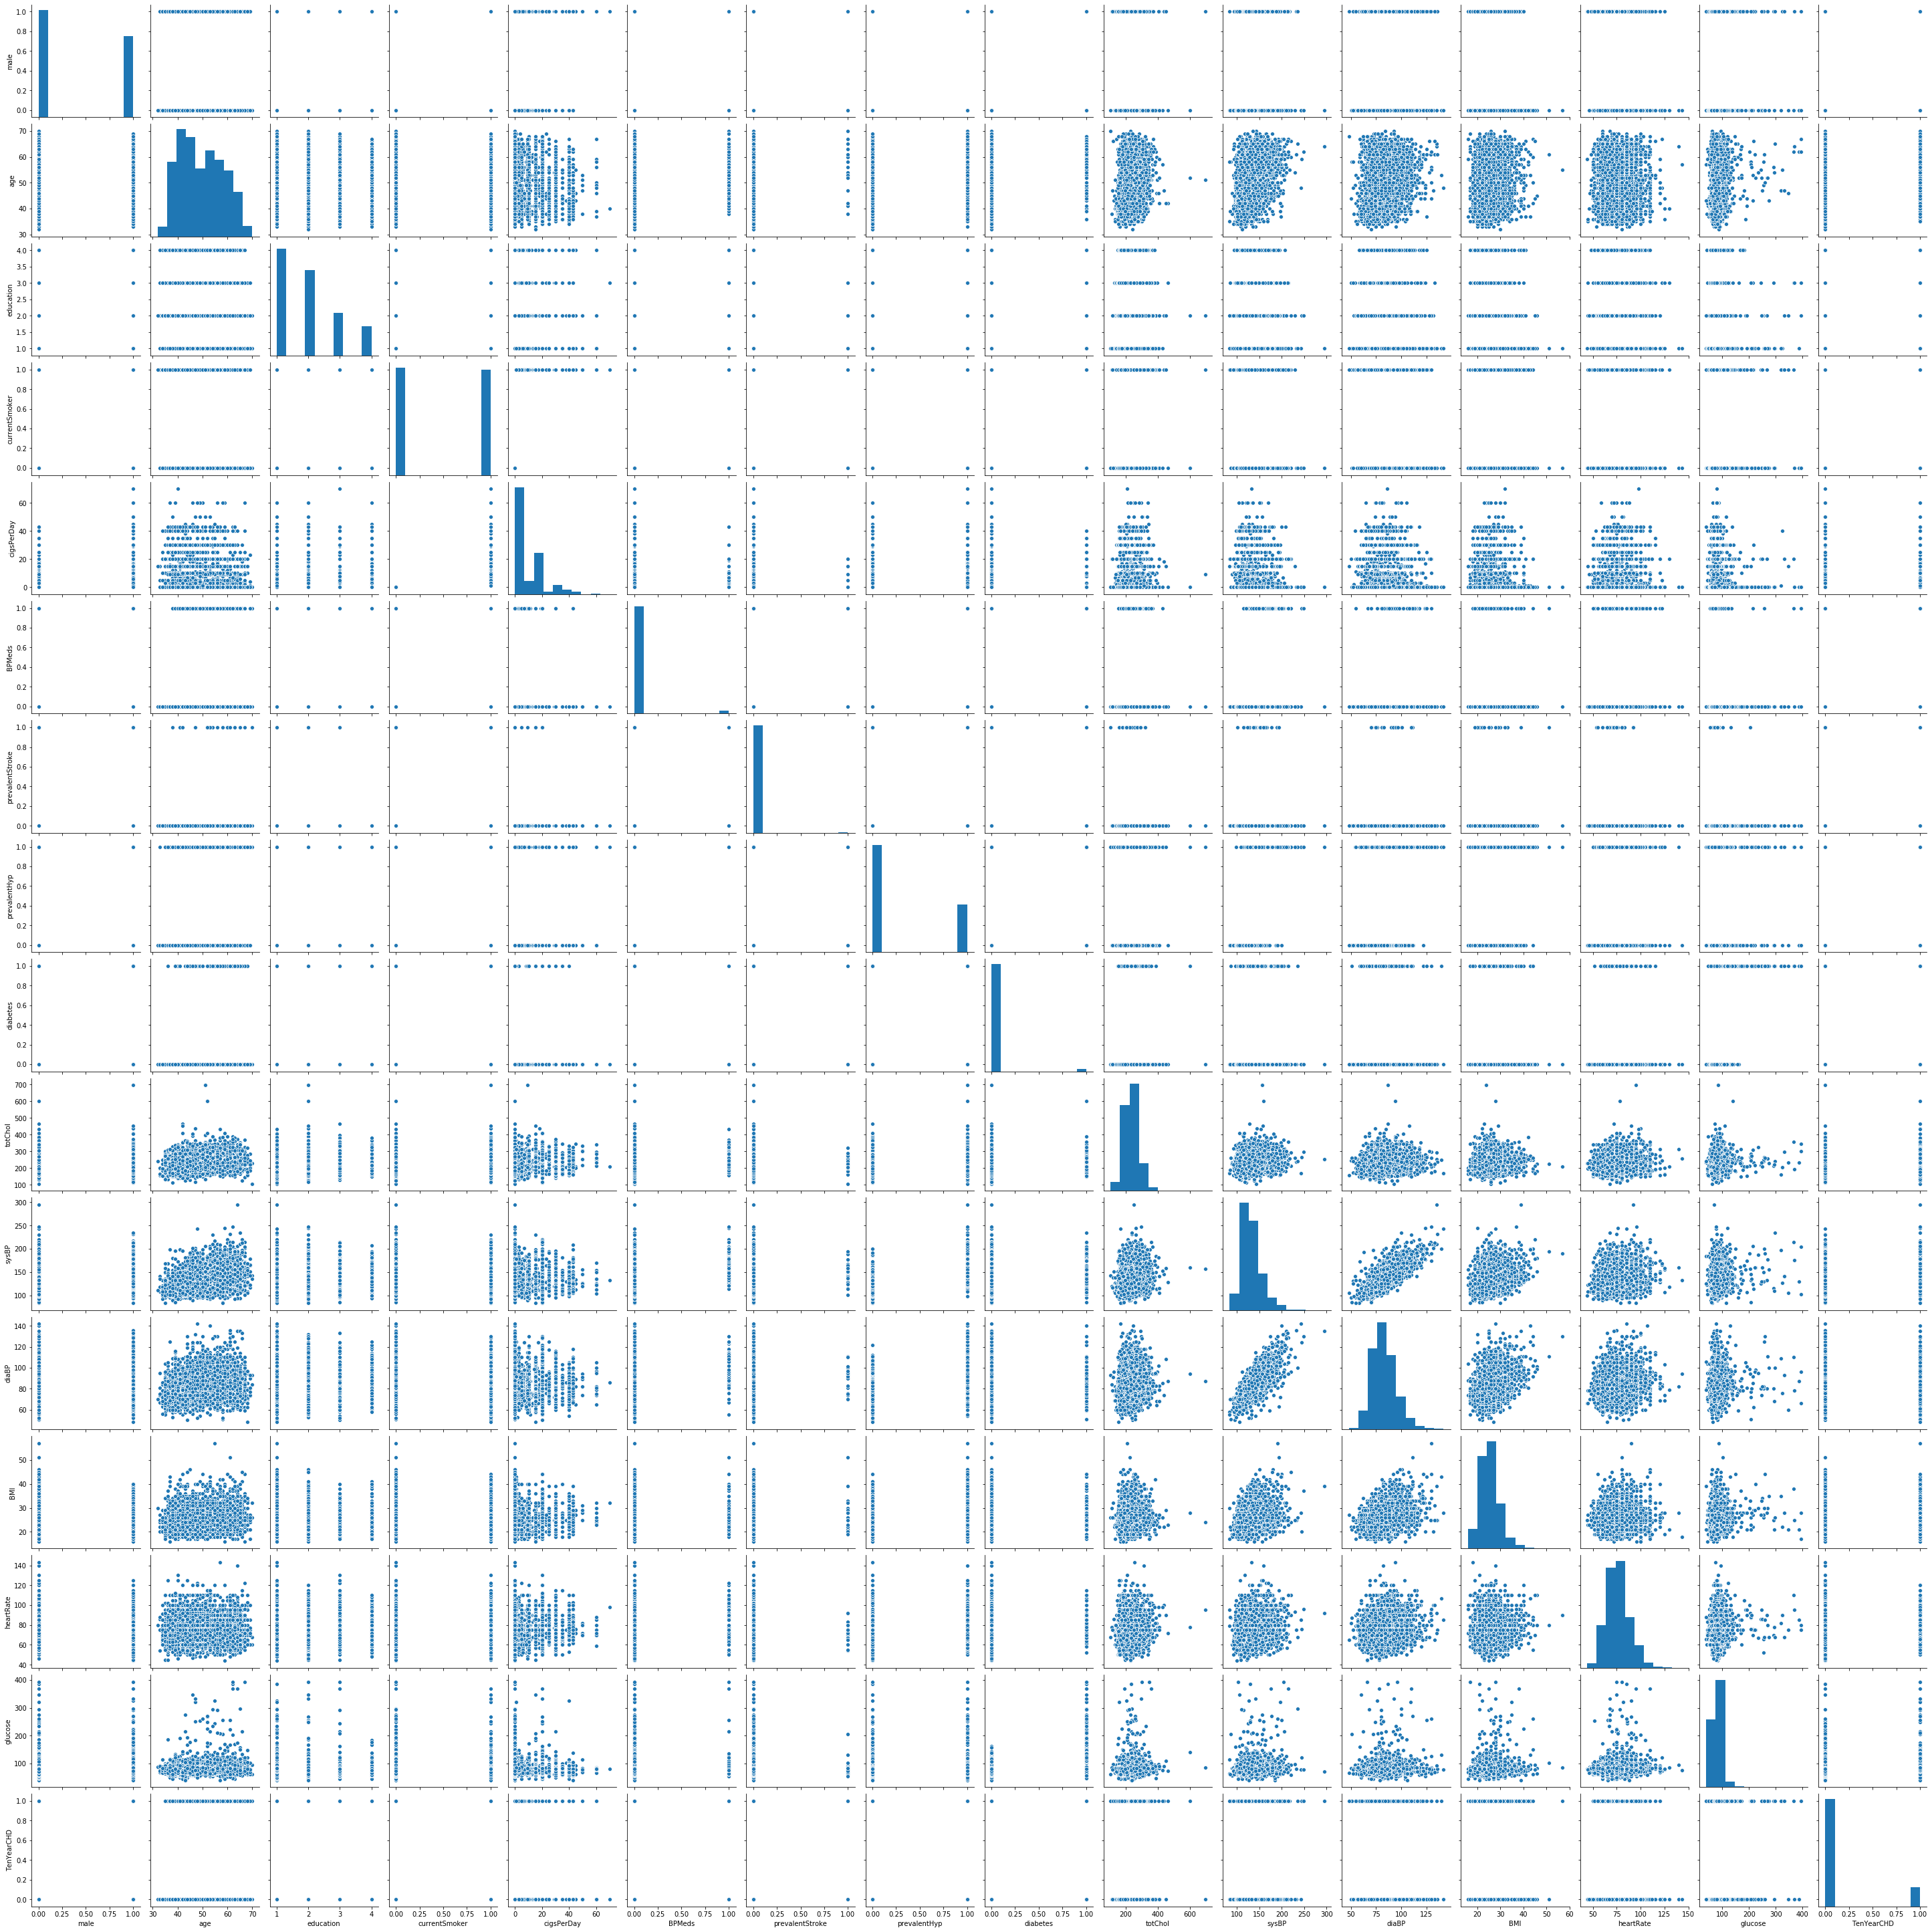

In [36]:
sns.pairplot(df)

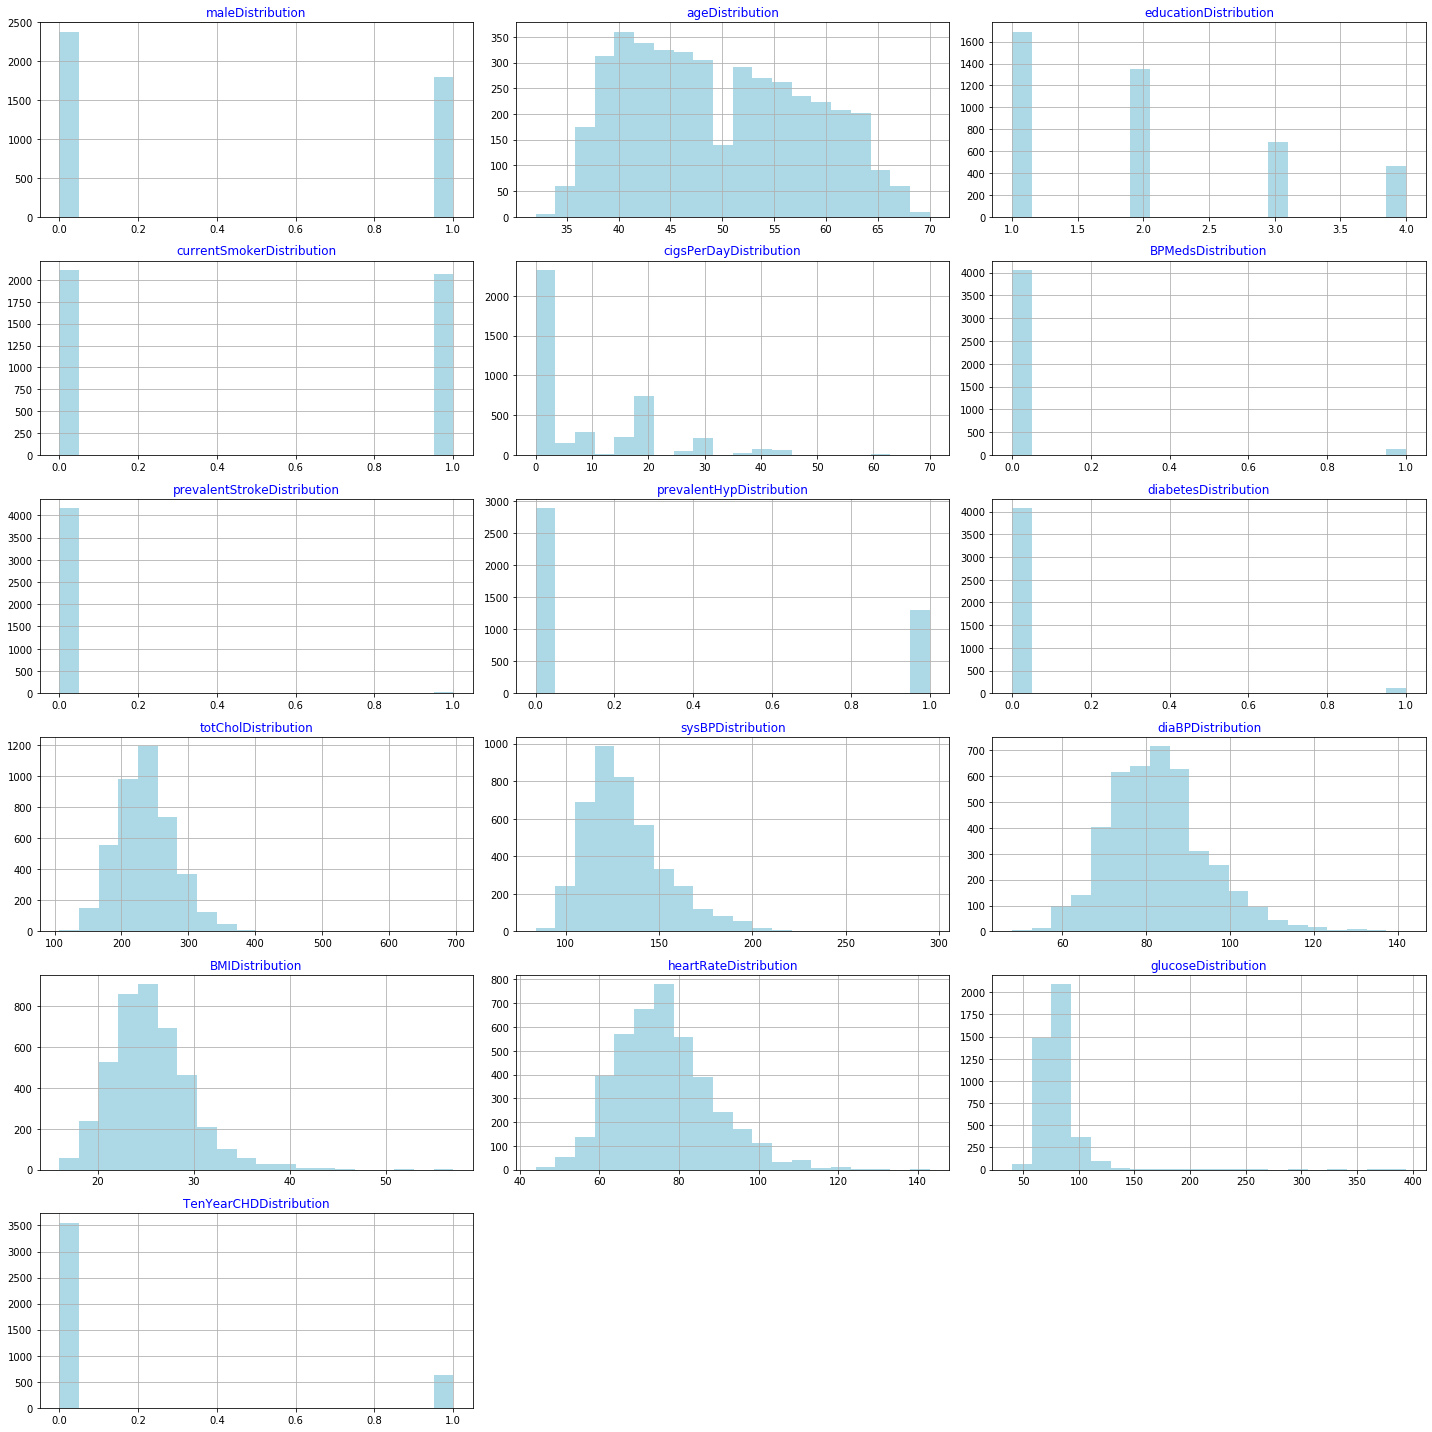

In [37]:
def histogr(dataframe,features,rows,cols):
    fig = plt.figure(figsize = (20,20))
    for f, feature in enumerate(features):
        a = fig.add_subplot(rows,cols,f+1)
        dataframe[feature].hist(bins = 20,ax=a,facecolor = 'lightblue')
        a.set_title(feature + "Distribution",color = 'blue')
    fig.tight_layout()
    plt.show()
histogr(df,df.columns,6,3)

 Problem statement and issue tree is focused on analyzing the factors of Age, BMI, blood chemistry, Hemodynamics and lifestyle

# percent of people that are diagnosed with CHD in 10 years

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import statsmodels.api as sm

from scipy import stats
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [2]:
df= pd.read_csv('/Users/aslihankoksoy/Documents/PLAY DATA/CleanedFr1.csv')

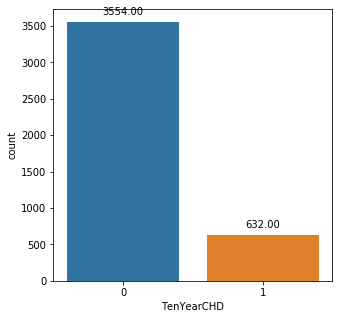

In [3]:
mpl.rcParams['figure.figsize'] = (5,5)
fig = plt.figure(figsize = (5,5))
countplot = sns.countplot(x='TenYearCHD',data=df)
for p in countplot.patches:
    countplot.annotate(format(p.get_height(), '.2f'), 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    

In [5]:
632/(3554+632)*100

15.09794553272814

15% of the patients are diagnosed with heart disease within 10 years. The percentage of the disease:control groups 17:83

# ratio of women to men in diagnosed CHD

<Figure size 360x360 with 0 Axes>

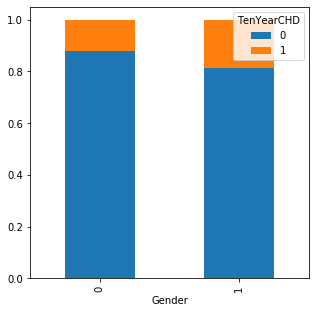

In [6]:
fig = plt.figure(figsize = (5,5))
table=pd.crosstab(df.male,df.TenYearCHD)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.show()

<Figure size 360x360 with 0 Axes>

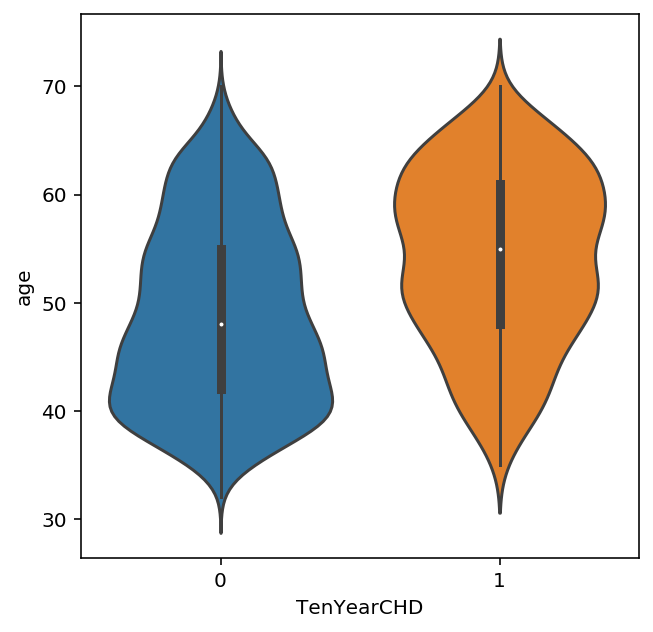

In [57]:
plt.figure(figsize=(5,5))
sns.violinplot(x='TenYearCHD', y='age', data=df)

**The risk of CHD increases after age 50.

Text(0.5, 0, 'hypertension')

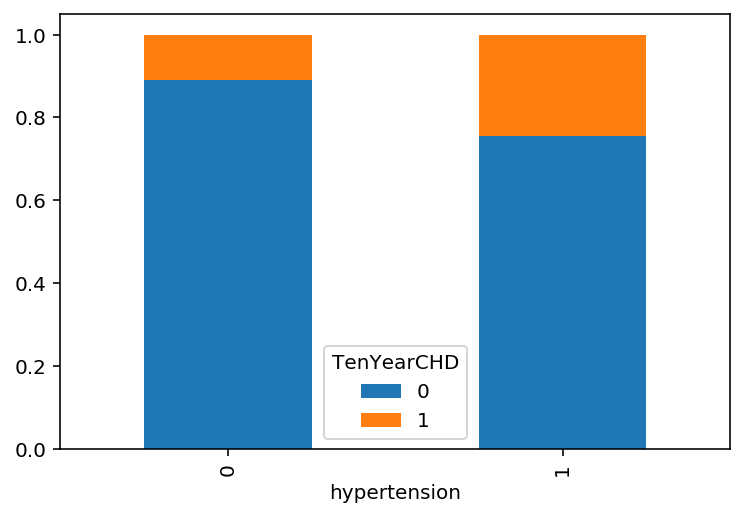

In [58]:
table=pd.crosstab(df.prevalentHyp,df.TenYearCHD)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('hypertension')

**The group with hypertension havs 2x mCHDore  compared to the group without hypertention.

Text(0.5, 0, 'Stroke')

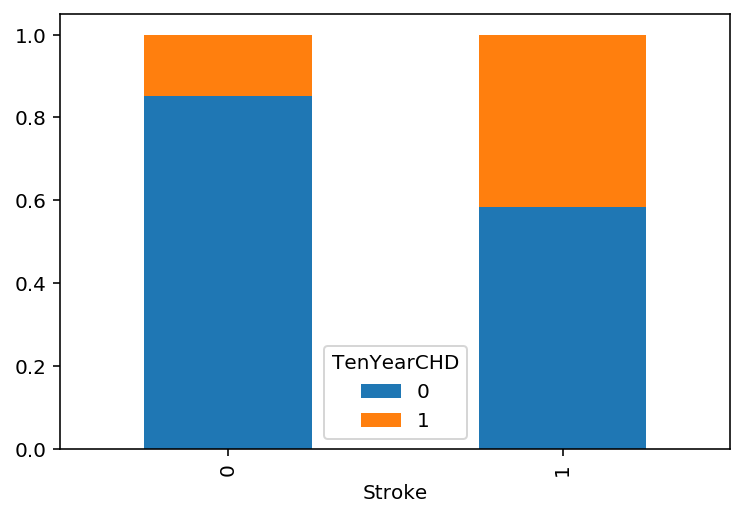

In [59]:
table=pd.crosstab(df.prevalentStroke,df.TenYearCHD)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Stroke')

**People with a history of stroke have 2.5x more risk of having CHD

In [60]:
counter = 0
for i in df.totChol:
    if i>210:
        counter +=1
print('high cholesterol patient count = ', counter)

high cholesterol patient count =  2984


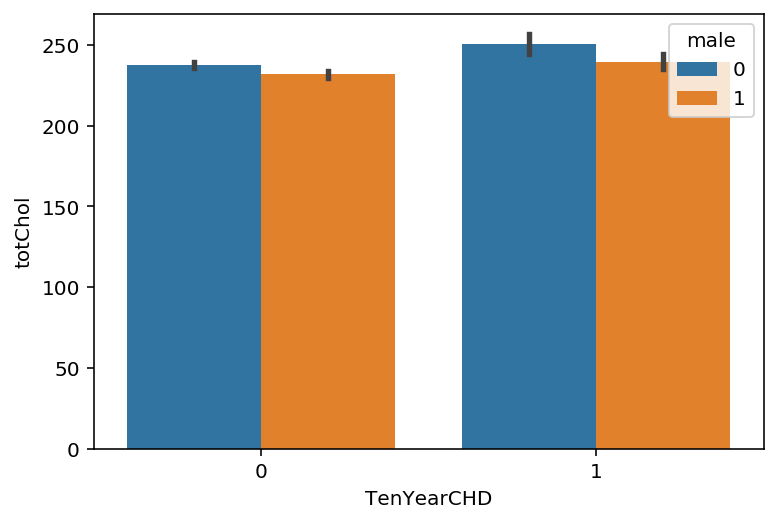

In [61]:
sns.barplot(x='TenYearCHD', y='totChol', hue = 'male', data=df)

**Both males and females with CHD have higher cholesterol compared to control.

# Inferential Statistics
Although we have paracticed with Lineer regression models in the SB Course, because the outcome(dependent variable) is binary (disease or not), it will be more correct to look at models of binary classification for analysis

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import statsmodels.api as sm

from scipy import stats
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.simplefilter(action='ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

In [110]:
df= pd.read_csv('/Users/aslihankoksoy/Documents/PLAY DATA/CleanedFr1.csv')

In [111]:
from statsmodels.tools import add_constant as add_constant
df_const = add_constant(df)

In [112]:
sm.chisqprob = lambda chisq, df: sm.chi2.sf(chisq, df)
cols=df_const.columns[:-1]
model=sm.Logit(df.TenYearCHD,df_const[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.377627
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4186
Model:                          Logit   Df Residuals:                     4170
Method:                           MLE   Df Model:                           15
Date:                Sat, 22 Aug 2020   Pseudo R-squ.:                  0.1102
Time:                        10:30:11   Log-Likelihood:                -1580.7
converged:                       True   LL-Null:                       -1776.6
Covariance Type:            nonrobust   LLR p-value:                 3.982e-74
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.1157      0.669    -12.127      0.000      -9.427      -6.804
male                0.5135      0.101      5.083      0.000       0.316       0.712
age                 0.0619      0.006      9.906      0.000       0.050       0.074
education          -0.0155      0.047     -0.333      0.739      -0.107       0.076
currentSmoker       0.0168      0.144      0.117      0.907      -0.266       0.299
cigsPerDay          0.0209      0.006      3.674      0.000       0.010       0.032
BPMeds              0.2596      0.221      1.177      0.239      -0.173       0.692
prevalentStroke     0.8809      0.453      1.944      0.052      -0.007       1.769
prevalentHyp        0.2192      0.130      1.692      0.091      -0.035       0.473
diabetes            0.1846      0.298      0.620      0.535      -0.399       0.768
totChol             0.0015      0.001      1.425      0.154      -0.001       0.004
sysBP               0.0140      0.004      3.916      0.000       0.007       0.021
diaBP              -0.0023      0.006     -0.382      0.703      -0.014       0.010
BMI                 0.0049      0.012      0.410      0.682      -0.018       0.028
heartRate          -0.0011      0.004     -0.282      0.778      -0.009       0.007
glucose             0.0066      0.002      3.064      0.002       0.002       0.011
===================================================================================
"""

### many of the variables have a p value above the significance cut-off of 0.05 

**Logit(p) = b0 +b1*male + b2*age + b3*cigperDay + b4*prevStroke + b5*sysBP + b6*glucose 

# Logistic regression for binary classification

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.80)

In [115]:
x_test

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2076,0,57,3.0,1,20.0,0.0,0,0,0,267.0,102.0,62.0,20.0,60.0,82.0
3217,0,37,4.0,0,0.0,0.0,0,0,0,165.0,108.0,75.0,22.0,75.0,83.0
3101,0,57,1.0,0,0.0,0.0,0,0,0,257.0,133.0,94.0,18.0,143.0,75.0
578,0,60,1.0,0,0.0,0.0,0,1,1,258.0,142.0,87.0,33.0,82.0,145.0
3340,1,47,1.0,1,15.0,0.0,0,0,0,206.0,125.0,72.0,21.0,80.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,0,46,1.0,0,0.0,0.0,0,1,0,212.0,148.0,92.0,26.0,62.0,75.0
1992,0,62,1.0,0,0.0,0.0,0,1,0,273.0,150.0,97.0,22.0,76.0,74.0
223,1,54,1.0,1,43.0,0.0,0,0,0,243.0,135.0,92.0,31.0,90.0,65.0
2251,0,39,2.0,1,9.0,0.0,0,0,0,270.0,110.0,78.0,22.0,75.0,68.0


In [116]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [118]:
model.score(x_test, y_test)

0.8579952267303103

In [119]:
model.predict_proba(x_test)

array([[0.77880686, 0.22119314],
       [0.95471404, 0.04528596],
       [0.9706295 , 0.0293705 ],
       ...,
       [0.86010421, 0.13989579],
       [0.93611149, 0.06388851],
       [0.92901697, 0.07098303]])

In [120]:
y_pred=model.predict(x_test)

<Figure size 576x360 with 0 Axes>

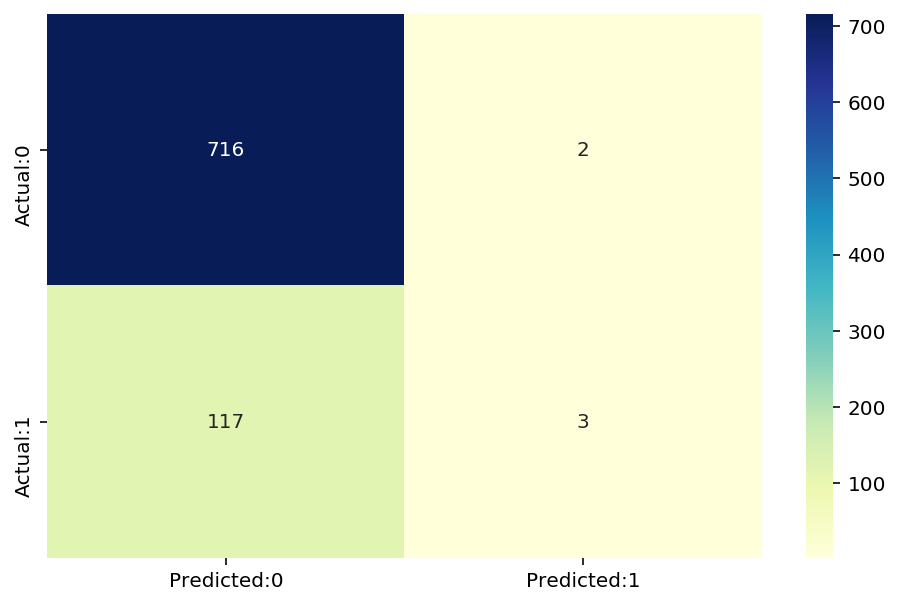

In [121]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [122]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [123]:
print('Model Accuracy = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity (Recall) or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value or Precision = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity),'\n',

'F1 score =  F1= TP/(TP +(FP+FN)/2) = ', TP/float(TP +(FP+FN)/2)


Model Accuracy = TP+TN/(TP+TN+FP+FN) =  0.8579952267303103 
 The Missclassification = 1-Accuracy =  0.14200477326968974 
 Sensitivity (Recall) or True Positive Rate = TP/(TP+FN) =  0.025 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9972144846796658 
 Positive Predictive value or Precision = TP/(TP+FP) =  0.6 
 Negative predictive Value = TN/(TN+FN) =  0.8595438175270108 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  8.975000000000136 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9777234636871508


(None, '\n')

('F1 score =  F1= TP/(TP +(FP+FN)/2) = ', 0.048)

The model's recall rate is very low which means many of the people with disease will go undiagnosed. This may be due to the imbalance in the data.

In [124]:
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % score)

F-Measure: 0.048


# balanced set results

In [125]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
model.predict(x_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,

In [127]:
model.score(x_test, y_test)

0.652744630071599

In [128]:
y_predicted=model.predict(x_test)

In [129]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[472, 246],
       [ 45,  75]])

<Figure size 576x360 with 0 Axes>

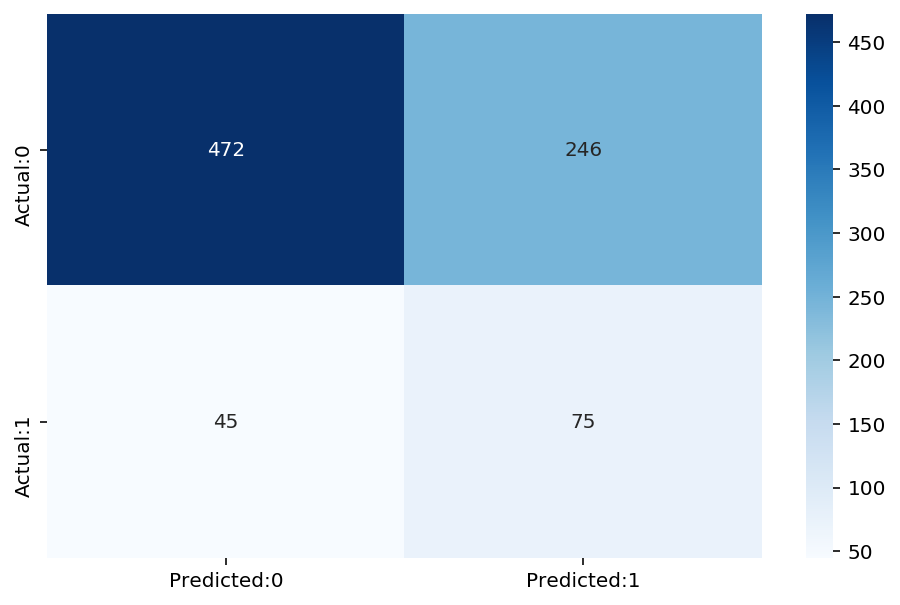

In [130]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Blues")

In [131]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
F1= TP/(TP +(FP+FN)/2)

In [132]:
print('Model Accuracy = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity (Recall) or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value or Precision = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity),'\n',

'F1 score =  F1= TP/(TP +(FP+FN)/2) = ', TP/float(TP +(FP+FN)/2)



Model Accuracy = TP+TN/(TP+TN+FP+FN) =  0.652744630071599 
 The Missclassification = 1-Accuracy =  0.347255369928401 
 Sensitivity (Recall) or True Positive Rate = TP/(TP+FN) =  0.625 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.6573816155988857 
 Positive Predictive value or Precision = TP/(TP+FP) =  0.2336448598130841 
 Negative predictive Value = TN/(TN+FN) =  0.9129593810444874 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.8241869918699185 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.5704449152542374


(None, '\n')

('F1 score =  F1= TP/(TP +(FP+FN)/2) = ', 0.3401360544217687)

### **This way we reach a better sensitivity(recall) but still both the f-score and recall are low and we need to improve this model

### **for this reason I will identify high impact factors and keep only the groups with p > 0.05 

# Transforming the DF to keep the variables with high impact (p<00.5)

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 12 best features

              Specs       Score
10            sysBP  709.169510
14          glucose  380.098408
1               age  308.389179
4        cigsPerDay  232.838592
9           totChol  201.825541
11            diaBP  154.924469
7      prevalentHyp   89.192747
8          diabetes   38.051347
5            BPMeds   31.225975
0              male   19.780876
12              BMI   16.008645
6   prevalentStroke   13.216501


#### **clearly selectKbest method will not be helpful in choosing the most important parameters so I will use LogReg matrix and continue with only variables with p<0.05

In [56]:
df_new = df[['male','age','cigsPerDay','sysBP', 'glucose' ,'prevalentStroke','TenYearCHD']]

In [57]:
df_new.head()

,male,age,cigsPerDay,sysBP,glucose,prevalentStroke,TenYearCHD
0,1,39,0.0,106.0,77.0,0,0
1,0,46,0.0,121.0,76.0,0,0
2,1,48,20.0,128.0,70.0,0,0
3,0,61,30.0,150.0,103.0,0,1
4,0,46,23.0,130.0,85.0,0,0


In [133]:
from statsmodels.tools import add_constant as add_constant
df_new_const = add_constant(df_new)
df_new_const.head()

,const,male,age,cigsPerDay,sysBP,glucose,prevalentStroke,TenYearCHD
0,1.0,1,39,0.0,106.0,77.0,0,0
1,1.0,0,46,0.0,121.0,76.0,0,0
2,1.0,1,48,20.0,128.0,70.0,0,0
3,1.0,0,61,30.0,150.0,103.0,0,1
4,1.0,0,46,23.0,130.0,85.0,0,0


In [135]:
sm.chisqprob = lambda chisq, df: sm.chi2.sf(chisq, df)
cols=df_new_const.columns[:-1]
model=sm.Logit(df_new.TenYearCHD,df_new_const[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.378552
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4186
Model:                          Logit   Df Residuals:                     4179
Method:                           MLE   Df Model:                            6
Date:                Sat, 22 Aug 2020   Pseudo R-squ.:                  0.1080
Time:                        10:56:29   Log-Likelihood:                -1584.6
converged:                       True   LL-Null:                       -1776.6
Covariance Type:            nonrobust   LLR p-value:                 8.177e-80
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.4422      0.392    -21.536      0.000      -9.211      -7.674
male                0.4984      0.098      5.088      0.000       0.306       0.690
age                 0.0641      0.006     10.749      0.000       0.052       0.076
cigsPerDay          0.0212      0.004      5.478      0.000       0.014       0.029
sysBP               0.0172      0.002      8.491      0.000       0.013       0.021
glucose             0.0075      0.002      4.572      0.000       0.004       0.011
prevalentStroke     0.9679      0.448      2.162      0.031       0.090       1.845
===================================================================================
"""

In [136]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                 CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                0.000100       0.000465    0.000216   0.000
male                 1.358531       1.994398    1.646041   0.000
age                  1.053831       1.078764    1.066224   0.000
cigsPerDay           1.013701       1.029188    1.021415   0.000
sysBP                1.013292       1.021354    1.017315   0.000
glucose              1.004277       1.010730    1.007498   0.000
prevalentStroke      1.094694       6.329839    2.632344   0.031


## this fitted model shows that ; being male increases the odds of having CHD by 65% and having had a Stroke increases the odds by 2.6x

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import statsmodels.api as sm
import xgboost as xgb

from scipy import stats
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.simplefilter(action='ignore')


In [240]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [241]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [242]:
logreg.score(x_test, y_test)

0.8556085918854416

<Figure size 576x360 with 0 Axes>

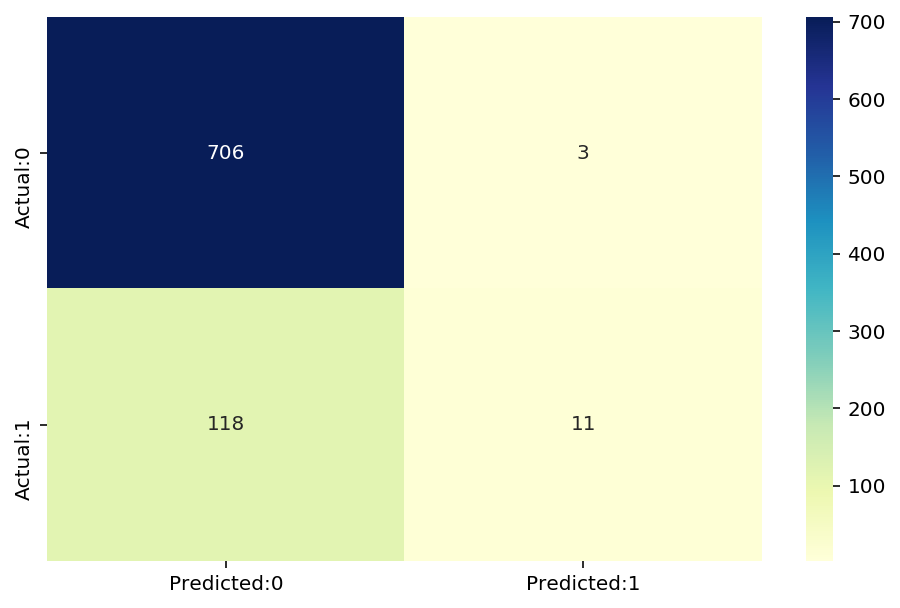

In [243]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [244]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
precision =TP /float(TP + FP)

In [245]:
print(sensitivity)

0.08527131782945736


In [246]:
F1 = 2 * float(precision * sensitivity) / float(precision + sensitivity)

In [247]:
F1

0.15384615384615385

## comparing other models

In [248]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [249]:
from sklearn.ensemble import RandomForestClassifier
randFor = RandomForestClassifier(n_estimators=500)
randFor.fit(x_train,y_train)
y_predicted = randFor.predict(x_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [250]:
randFor.score(x_test, y_test)

0.837708830548926

In [251]:
sklearn.metrics.recall_score(y_test, y_predicted)

0.12403100775193798

In [252]:
sklearn.metrics.f1_score(y_test, y_predicted)

0.1904761904761905

In [253]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, Y_train, Y_test= train_test_split(X, y, test_size=0.2, random_state=123)
XGBmodel = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=123)
XGBmodel.fit(X_train, Y_train) 
Y_predicted = XGBmodel.predict(X_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              silent=None, subsample=1, verbosity=1)

In [254]:
XGBmodel.score(X_test, Y_test)

0.8520286396181385

In [255]:
sklearn.metrics.recall_score(Y_test, Y_predicted)

0.05737704918032787

### with all the models that I have tried so far, I am still not able elevate the sensitivity to a reasonable level so that I do not miss the actual patients with CHD

##  So far with the models I have been trying; my aim is to predict the probability of having CHD bw 0 and 1, assuming all probabilities greater than 0.5 will indicate a CHD. However given the fact that a type1 error (diagnosing a false positive) is more acceptable than diagnosing a false negative I am willing to lower my treshold below 0.5; thus catching more CHDs even though some of these may be false positives.



In [278]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [279]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [284]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')
    

With 0.1 threshold the Confusion Matrix is  
 [[309 400]
 [ 23 106]] 
 with 415 correct predictions and 23 Type II errors( False Negatives) 

 Sensitivity:  0.8217054263565892 Specificity:  0.43582510578279265 



With 0.2 threshold the Confusion Matrix is  
 [[564 145]
 [ 61  68]] 
 with 632 correct predictions and 61 Type II errors( False Negatives) 

 Sensitivity:  0.5271317829457365 Specificity:  0.7954866008462623 



With 0.3 threshold the Confusion Matrix is  
 [[668  41]
 [ 94  35]] 
 with 703 correct predictions and 94 Type II errors( False Negatives) 

 Sensitivity:  0.2713178294573643 Specificity:  0.9421720733427362 



With 0.4 threshold the Confusion Matrix is  
 [[697  12]
 [108  21]] 
 with 718 correct predictions and 108 Type II errors( False Negatives) 

 Sensitivity:  0.16279069767441862 Specificity:  0.9830747531734838 





<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate (1 - specificity)')

Text(0, 0.5, 'True Positive Rate (recall)')

Text(0.5, 1.0, 'Receiver operating characteristic (ROC) curve')

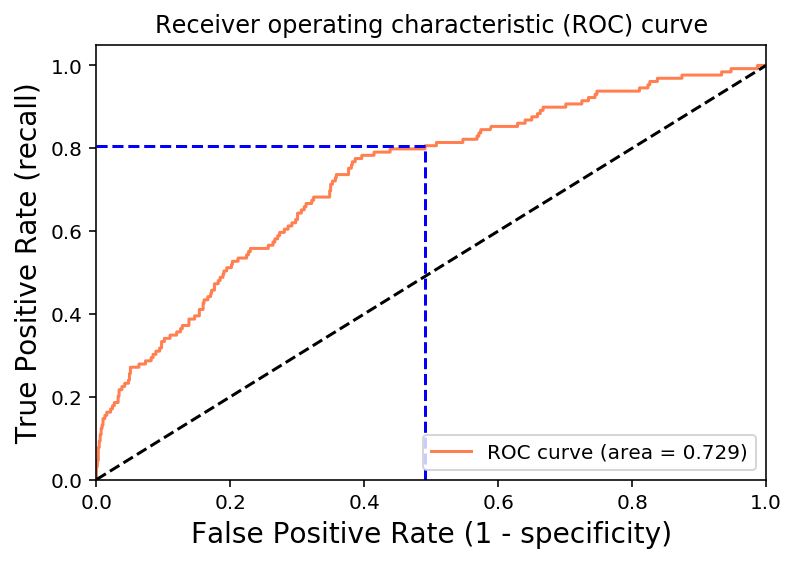

In [286]:

idx = np.min(np.where(tpr > 0.80)) # index of the first threshold for which the sensibility > 0.8

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


## By lowering the treshold we are able to increase the sensitivity(recall) of the model up to 0.85; which is also reflected by the AUC in ROC curve. 